# **Introduction**

## About the Data Set


The dataset contain a Vehicle health management system that uses data from sensors and other sources to predict and prevent vehicle malfunctions.

## Task

By analyzing the data collected from different vehicles, I will be able to understand the reliability of the data and find relevant insights about the fleet's performance.

To assist the Operational Fleet Manager:
*   Reduce fleet operational expense by 5%
*   Reduce fleet downtime by 15%
*   Ensure safety events reduce by 20%



# **Preparation**

## Loading the Libraries

Loading Python relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AmitTannenbaum/Myproject/main/product_owner_data%20analyst_home_assignment_dataset.csv')

## Understanding the Data

## Data Shape

In [ ]:
print(f'This Dataframe has {df.shape[0]} rows over {df.shape[1]} columns')

This Dataframe has 223657 rows over 7 columns


## Sampling some rows

In [ ]:
df.sample(10)

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred
79278,40,31/01/2023 18:17,612216.745,14.78125,3.48,84.888889,83.173164
222515,15,29/01/2023 9:46,293009.290,20.09375,2.84,92.555556,91.744056
99951,49,31/01/2023 4:52,351060.805,13.18750,2.96,88.111111,90.588356
17236,39,31/01/2023 13:24,291061.615,16.50000,3.36,88.444444,88.026503
122164,20,02/01/2023 14:08,218723.690,14.37500,1.80,84.000000,83.802974
35900,50,27/01/2023 11:57,342864.025,26.28125,3.28,88.666667,89.675469
2058,23,02/01/2023 20:18,376378.505,9.78125,3.84,85.666667,86.116388
207015,34,31/01/2023 16:00,337848.625,12.09375,3.00,69.000000,75.756328
34556,27,26/01/2023 19:14,317311.715,15.09375,2.48,86.888889,87.495789
26410,30,31/01/2023 6:44,229885.955,13.59375,2.08,85.000000,82.682787


## Data Dictionary

* **vin_id** - Anonymized VIN (Vehicle Identification Number)
* **timestamp**
* **sig1** - Anonymized predictor 1
* **sig2** - Anonymized predictor 2
* **sig3** - Anonymized predictor 3
* **y_true** - Real value
* **y_pred** - Model’s prediction


# **Cleanup**

In the following section I will remove unnecessary columns and deal with empty and duplicated rows. 

## Null Values

In [ ]:
df.isnull().sum()

vin_id       0
timestamp    0
sig1         0
sig2         0
sig3         0
y_true       0
y_pred       0
dtype: int64

This dataset doesn't contain any NaN values, so further cleanup in this area is not required

## Validating Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223657 entries, 0 to 223656
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   vin_id     223657 non-null  int64  
 1   timestamp  223657 non-null  object 
 2   sig1       223657 non-null  float64
 3   sig2       223657 non-null  float64
 4   sig3       223657 non-null  float64
 5   y_true     223657 non-null  float64
 6   y_pred     223657 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.9+ MB


Transforming the timestamp into a valid datetime object

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223657 entries, 0 to 223656
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   vin_id     223657 non-null  int64         
 1   timestamp  223657 non-null  datetime64[ns]
 2   sig1       223657 non-null  float64       
 3   sig2       223657 non-null  float64       
 4   sig3       223657 non-null  float64       
 5   y_true     223657 non-null  float64       
 6   y_pred     223657 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 11.9 MB


## Duplicates Rows

In [ ]:
df.nunique()

vin_id           50
timestamp      8117
sig1         198232
sig2            297
sig3            184
y_true          843
y_pred       216669
dtype: int64

Although there is a large difference in the number of unique values between columns, it does not necessarily indicate a problem since all values can appear multiple times. However, it is still important to check for duplicate rows in the dataset to ensure data integrity. 
I will investigate for any duplicate rows and remove them as needed.

In [ ]:
df[df.duplicated()].head()

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred
472,12,2023-01-29 03:24:00,151029.97,16.28125,2.52,85.0,87.492878
705,12,2023-01-29 06:44:00,151095.65,19.09375,3.92,85.0,83.723630
712,12,2023-01-29 06:53:00,151095.65,19.28125,3.92,85.0,83.818046
1179,38,2023-01-26 16:04:00,553829.03,18.09375,1.92,85.0,80.967368
1525,50,2023-02-01 16:19:00,344456.18,13.00000,1.76,84.0,83.690079


There are several duplicated rows, I will get rid of them

In [ ]:
original_rows = len(df)
df.drop_duplicates(inplace=True)
new_rows = len(df)
rows_deleted = original_rows - new_rows
print(f"{rows_deleted} rows were deleted.")

917 rows were deleted.


## New calculated columns

From a conversation with the assignment requester I understood that the difference between y_true and y_pred is critical. I will use this column later

In [ ]:
df['percentage_difference'] = abs((df['y_pred'] - df['y_true']) / df['y_true'])
df

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred,percentage_difference
0,18,2023-01-26 03:34:00,282271.810,12.28125,3.80,40.111111,41.470903,0.033901
1,18,2023-01-26 03:34:00,282271.860,12.18750,3.76,40.888889,41.823414,0.022855
2,18,2023-01-26 03:35:00,282272.005,12.09375,3.44,43.111111,42.294691,0.018938
3,18,2023-01-26 03:36:00,282272.420,11.87500,4.76,46.222222,43.942626,0.049318
4,18,2023-01-26 03:37:00,282272.600,11.78125,3.64,47.666667,44.317288,0.070267
...,...,...,...,...,...,...,...,...
223652,38,2023-01-30 13:25:00,0.000,22.78125,3.32,50.777778,50.852933,0.001480
223653,38,2023-01-30 13:27:00,0.000,22.87500,3.12,53.000000,51.245934,0.033096
223654,28,2023-01-27 07:41:00,309695.775,19.00000,1.80,84.777778,82.712948,0.024356
223655,28,2023-01-27 07:42:00,309695.775,19.00000,1.80,85.000000,83.029383,0.023184


# **Exploratory Data Analysis**

##Categorical, Quantitative

In [ ]:
categorical = ['vin_id']
numerical   = ['sig1', 'sig2','sig3','y_true','y_pred','percentage_difference']

## Summary Statistics

In [ ]:
def get_numeric_details(df, sort_column='mean', sort_order=False):
    res = pd.DataFrame()
    numeric_columns = df.select_dtypes(include='number').columns

    for column in numeric_columns:
        data = pd.DataFrame({'min':[df[column].min()],
                             'quantile 25':df[column].quantile(.25),
                             'quantile 50':df[column].quantile(.50),
                             'quantile 75':df[column].quantile(.75),
                             'max':df[column].max(),
                             'mean':df[column].mean(),
                             'median':df[column].median(),
                             'mode': ','.join(str(obj) for obj in list(df[column].mode().values)),
                             'std':df[column].std(),
                             'count':df[column].count(),
                             'nunique':df[column].nunique(),
                             'skew':df[column].skew()
                            },index=[column])
        res = res.append(data)
    return res

get_numeric_details(df)

,min,quantile 25,quantile 50,quantile 75,max,mean,median,mode,std,count,nunique,skew
vin_id,1.000000e+00,13.000000,25.000000,37.000000,50.000000,25.038668,25.000000,11,14.263944,222740,50,0.068756
sig1,0.000000e+00,248332.753750,294507.527500,350331.507500,622573.125000,322437.106047,294507.527500,151558.99,112704.933077,222740,198232,1.226657
sig2,0.000000e+00,13.375000,16.687500,20.281250,32.281250,16.376841,16.687500,0.0,5.720862,222740,297,-0.867286
sig3,1.600000e-01,2.480000,3.320000,3.760000,5.760000,3.122123,3.320000,3.8,0.747099,222740,184,-0.434025
y_true,2.300000e+01,83.666667,85.666667,89.555556,125.111111,85.363329,85.666667,85.0,7.514850,222740,843,-2.773348
y_pred,2.099555e+01,83.263396,85.425864,89.249556,109.887511,85.182569,85.425864,83.25558286,6.734850,222740,216669,-3.397831
percentage_difference,5.053940e-07,0.008320,0.017474,0.030309,0.363205,0.023000,0.017474,0.04423924595238101,0.022539,222740,220955,2.920107


## Summary Statistics Observations

<div style='background:coral;font-size:15px'> 

<b> Initial Observations: </b>
* <b> sig1 </b>
    * There is a minimum value with 0 (?) 
    * The maximum value is 622,573 most of the values (75%) are up to 350,331?(?) that sounds a bit too much
* <b> sig2 </b>
    * There is a minimum value with 0 (?)
* <b> sig3 </b>
    * The minimum value a bit low considering the 25% percentiles 
* <b> y_true / y_pred </b>
    * The minimum value a bit low considering the 25% percentiles 
* <b> Data Distribution </b>
    * Based on the summary statistics, I can see that all mean values are almost equal to the median values, which indicates a normal distribution. <br>
    * The following sections will visualize these distributions
</div>

**Validating values with low min**

In [ ]:
sig1_min_filter = df['sig1'] == 0
df[sig1_min_filter].head(5)

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred,percentage_difference
44257,32,2023-01-31 06:51:00,0.0,15.00000,2.92,59.000000,60.502822,0.025472
44258,32,2023-01-31 06:52:00,0.0,15.00000,2.92,58.444444,60.595313,0.036802
44259,32,2023-01-31 06:52:00,0.0,15.00000,2.92,58.333333,60.595313,0.038777
44260,32,2023-01-31 06:52:00,0.0,15.00000,2.92,58.222222,60.595313,0.040759
44261,32,2023-01-31 06:52:00,0.0,15.09375,2.92,58.000000,60.595313,0.044747


I will check how many cases for each car

In [ ]:

sig1_cars_with_value_0 = df[sig1_min_filter].groupby('vin_id').agg(number_of_tests=('vin_id', 'size'))
sig1_cars_with_value_0 = sig1_cars_with_value_0.sort_values('number_of_tests')

# Print the sorted DataFrame
sig1_cars_with_value_0

,number_of_tests
vin_id,
42,1
38,2
2,3
5,3
16,4
18,7
30,7
20,8
46,8


In [ ]:
sig2_min_filter = df['sig2'] == 0
df[sig2_min_filter]

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred,percentage_difference
4513,42,2023-01-26 05:01:00,196190.285,0.0,2.28,81.333333,81.142953,0.002341
4514,42,2023-01-26 05:01:00,196190.310,0.0,2.24,82.111111,82.570551,0.005595
4515,42,2023-01-26 05:01:00,196190.320,0.0,2.44,82.444444,82.976156,0.006449
4516,42,2023-01-26 05:02:00,196190.440,0.0,3.28,84.333333,82.713358,0.019209
4517,42,2023-01-26 05:03:00,196191.205,0.0,3.28,83.666667,82.757192,0.010870
...,...,...,...,...,...,...,...,...
222684,42,2023-01-29 20:32:00,196829.760,0.0,3.96,88.666667,84.240593,0.049918
222685,42,2023-01-29 20:32:00,196829.850,0.0,3.96,88.777778,84.205709,0.051500
222686,42,2023-01-29 20:32:00,196829.985,0.0,3.72,88.333333,85.816119,0.028497
222687,42,2023-01-29 20:33:00,196830.055,0.0,1.84,85.222222,83.764574,0.017104


In [ ]:
sig2_cars_with_value_0 = df[sig2_min_filter].groupby('vin_id').agg(number_of_tests=('vin_id', 'size'))
sig2_cars_with_value_0 = sig2_cars_with_value_0.sort_values('number_of_tests')

# Print the sorted DataFrame
sig2_cars_with_value_0

,number_of_tests
vin_id,
44,3016
42,4337
14,4860


I found an unusually high number of observations where sig2 is equal to 0. This is concerning and requires investigation to determine the root cause. I will temporarily remove these cases from the data set and alert the client while I gather more data and perform tests to confirm if the problem is with the sensor.

In [ ]:
sig3_min_filter = df['sig3'] <1 
df[sig3_min_filter].head()

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred,percentage_difference
9310,20,2023-02-01 11:54:00,218668.660,14.50000,0.16,85.666667,82.686270,0.034791
22244,37,2023-02-01 18:15:00,275820.425,16.18750,0.28,78.888889,82.428931,0.044874
54339,21,2023-02-01 12:41:00,359575.640,10.28125,0.84,83.888889,82.188865,0.020265
89057,32,2023-01-27 13:07:00,316725.820,29.18750,0.32,81.888889,84.814346,0.035725
124804,31,2023-01-31 20:11:00,278483.805,14.78125,0.52,86.111111,83.619285,0.028937


In [ ]:
df[sig2_min_filter&sig1_min_filter]

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred,percentage_difference
223656,42,2023-01-26 14:18:00,0.0,0.0,2.52,70.0,73.428687,0.048981


## Visualizing the Data Distribution

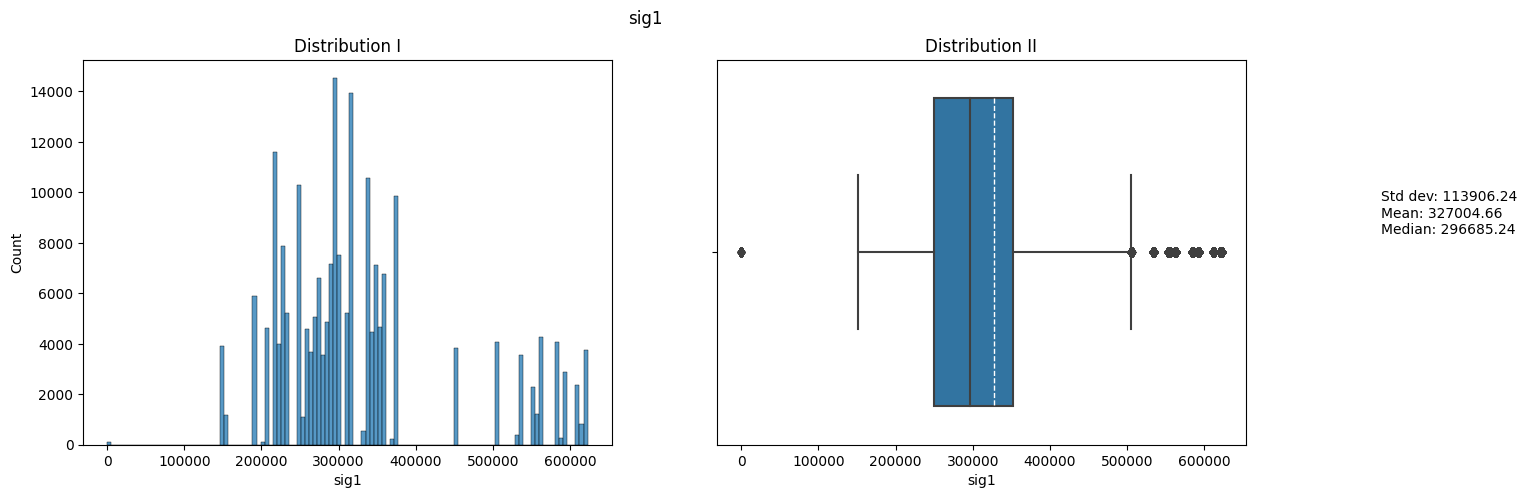

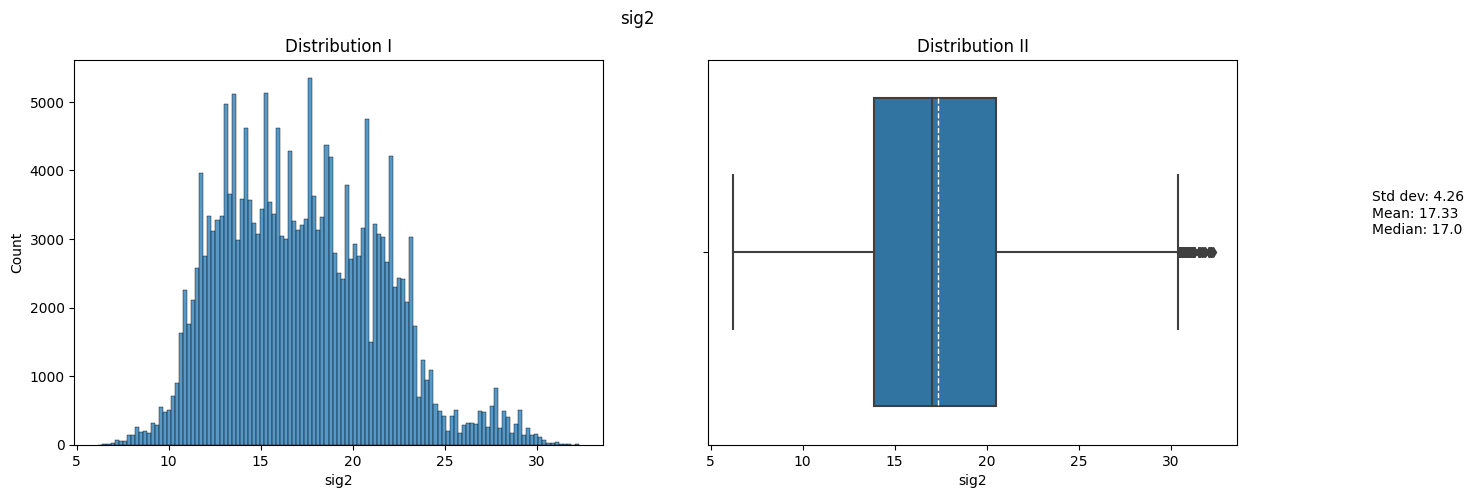

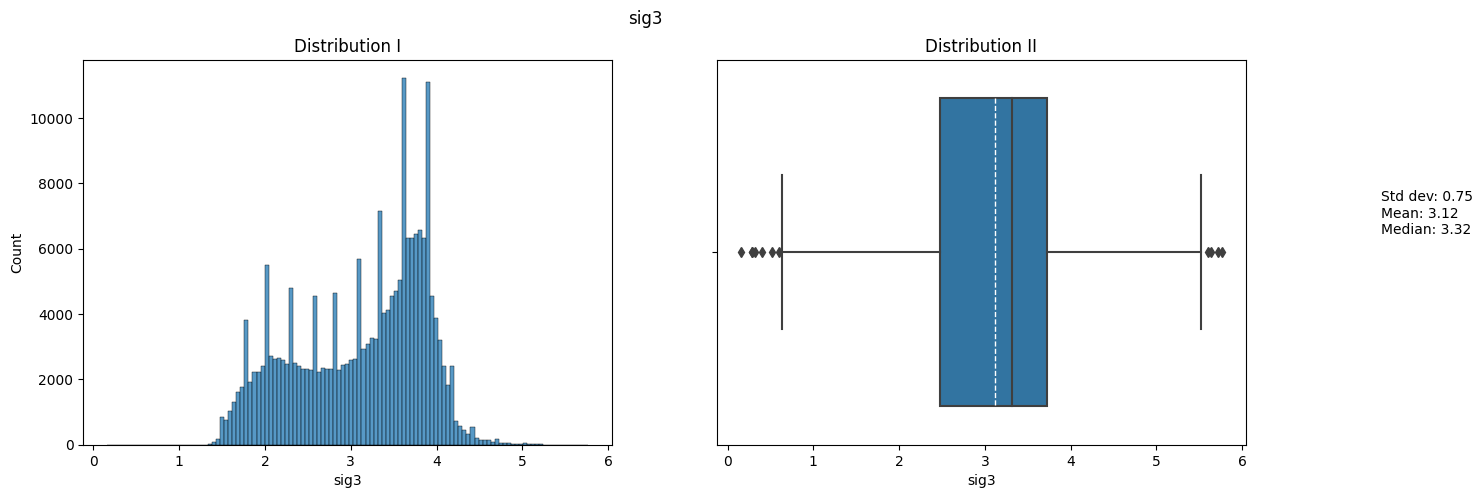

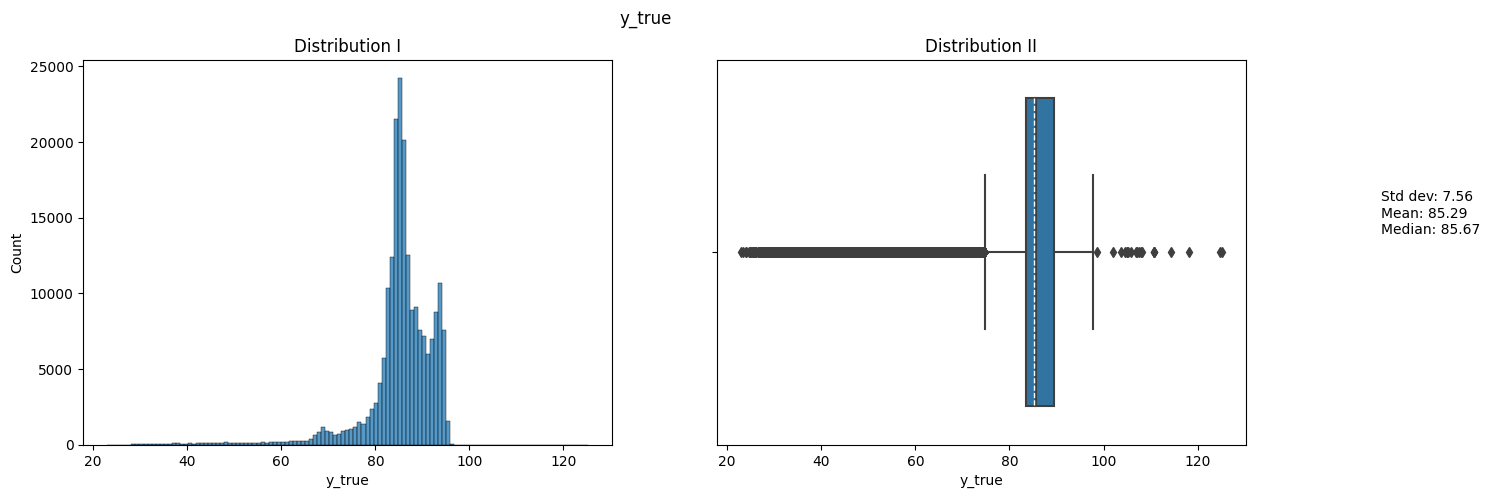

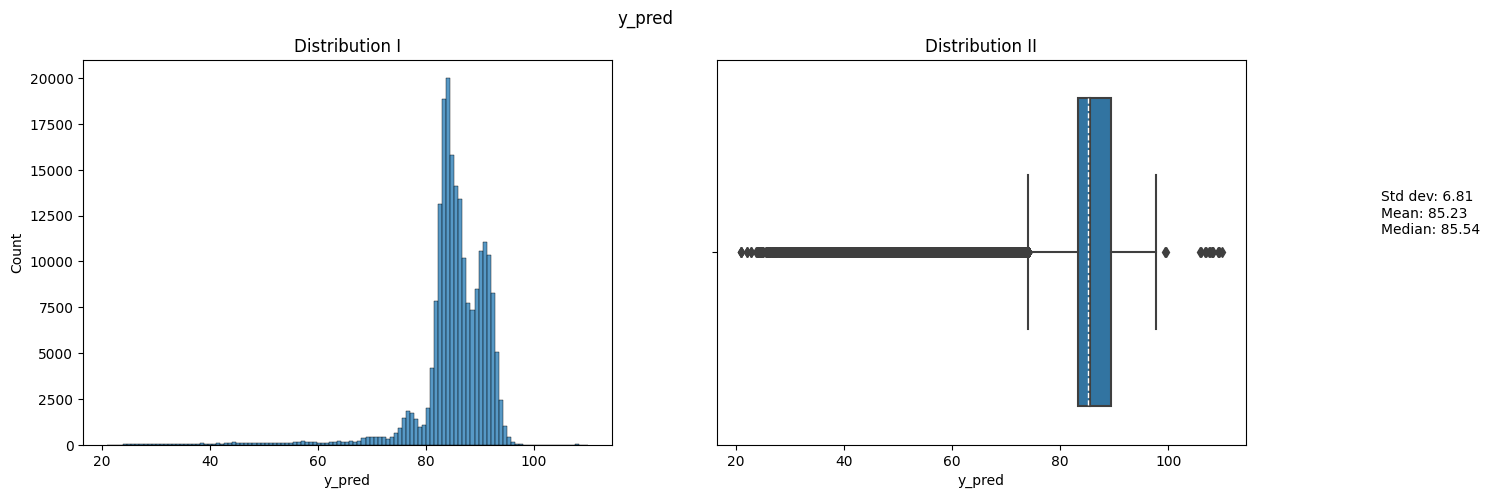

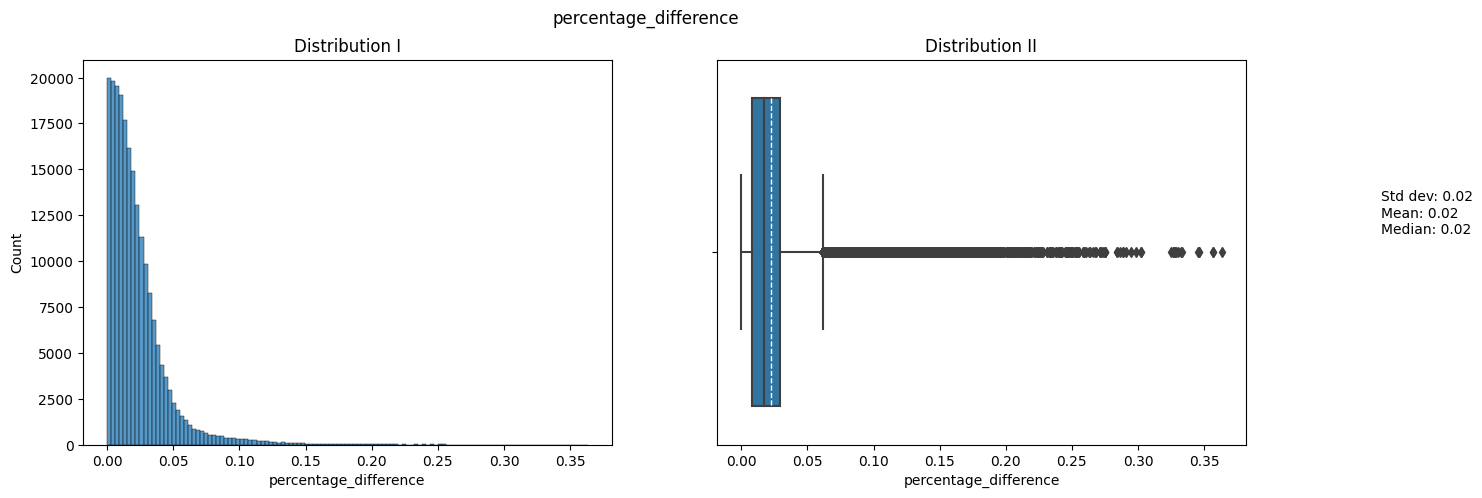

In [ ]:
def show_distribution(df, column):
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    
    text  = 'Std dev: ' + str(round(df[column].std(), 2)) + '\n'
    text += 'Mean: ' + str(round(df[column].mean(), 2)) + '\n'
    text += 'Median: ' + str(round(df[column].median(), 2)) + '\n'

    fig.suptitle(column)
    
    # Histogram
    num_bins = int(round(df[column].count()**(1/3)*2, 0))
    sns.histplot(df[column], bins=num_bins, ax=axes[0])
    axes[0].set_title('Distribution I')
    axes[0].text(0.99, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
    
    # Box Plot
    sns.boxplot(x=column,
                data=df, 
                showmeans=True,
                meanline=True,
                meanprops={'color':'white'},
                ax=axes[1])
    axes[1].set_title('Distribution II')

    plt.show()

for column in numerical:
    show_distribution(df,column)

## Dealing with Outliers

In [ ]:
col = 'sig2'

q1  = df[col].quantile(.25)
q3  = df[col].quantile(.75)
iqr = q3-q1
sig1_filter  = df[col] > (q1 - iqr * 1.5)

df = df[sig1_filter]

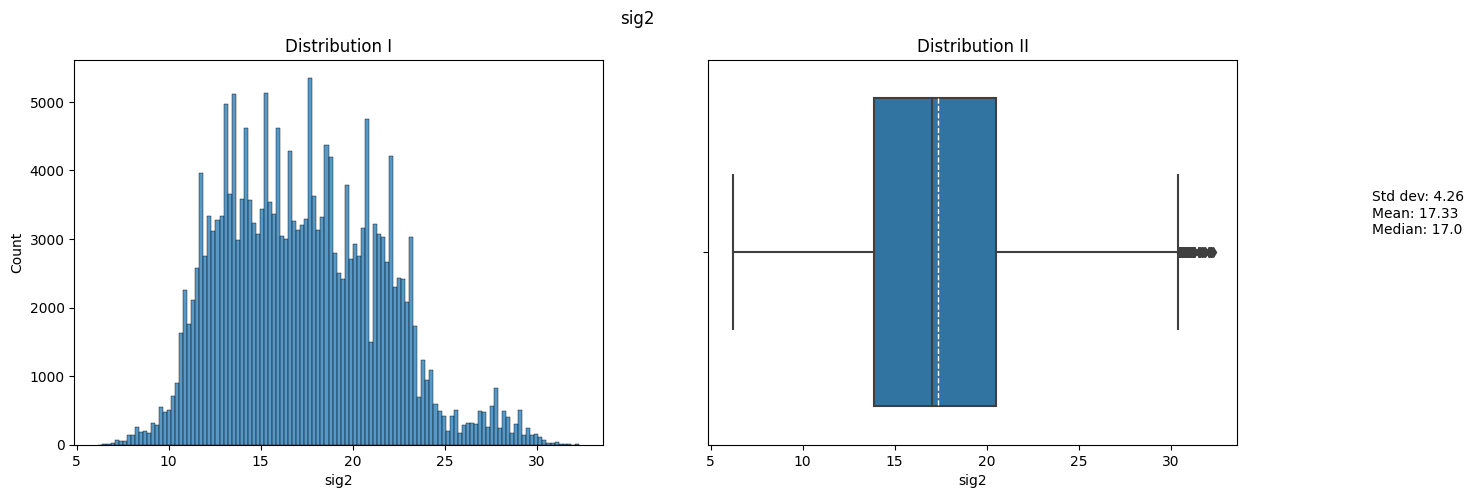

In [ ]:
def show_distribution(df, column):
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    
    text  = 'Std dev: ' + str(round(df[column].std(), 2)) + '\n'
    text += 'Mean: ' + str(round(df[column].mean(), 2)) + '\n'
    text += 'Median: ' + str(round(df[column].median(), 2)) + '\n'

    fig.suptitle(column)
    
    # Histogram
    num_bins = int(round(df[column].count()**(1/3)*2, 0))
    sns.histplot(df[column], bins=num_bins, ax=axes[0])
    axes[0].set_title('Distribution I')
    axes[0].text(0.99, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
    
    # Box Plot
    sns.boxplot(x=column,
                data=df, 
                showmeans=True,
                meanline=True,
                meanprops={'color':'white'},
                ax=axes[1])
    axes[1].set_title('Distribution II')

    plt.show()


show_distribution(df,'sig2')

In Sig2, I removed the zero values. Due to the large number of cases, I assumed the sensor was malfunctioning

## Cleanup function for future reads

In [ ]:
def load_df():
    url = 'https://raw.githubusercontent.com/AmitTannenbaum/Myproject/main/product_owner_data%20analyst_home_assignment_dataset.csv'
    df = pd.read_csv(url, parse_dates = ['timestamp'])
    df.drop_duplicates(inplace=True)
    col = 'sig2'
    q1  = df[col].quantile(.25)
    q3  = df[col].quantile(.75)
    iqr = q3-q1
    sig1_filter  = df[col] > (q1 - iqr * 1.5)
    df = df[sig1_filter]
    df['percentage_difference'] = abs((df['y_pred'] - df['y_true']) / df['y_true'])
    return df 

In [ ]:
df = load_df()

In [ ]:
df.head()

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred,percentage_difference
0,18,2023-01-26 03:34:00,282271.810,12.28125,3.80,40.111111,41.470903,0.033901
1,18,2023-01-26 03:34:00,282271.860,12.18750,3.76,40.888889,41.823414,0.022855
2,18,2023-01-26 03:35:00,282272.005,12.09375,3.44,43.111111,42.294691,0.018938
3,18,2023-01-26 03:36:00,282272.420,11.87500,4.76,46.222222,43.942626,0.049318
4,18,2023-01-26 03:37:00,282272.600,11.78125,3.64,47.666667,44.317288,0.070267


# **Bivariate Analysis**

### Numeric to numeric

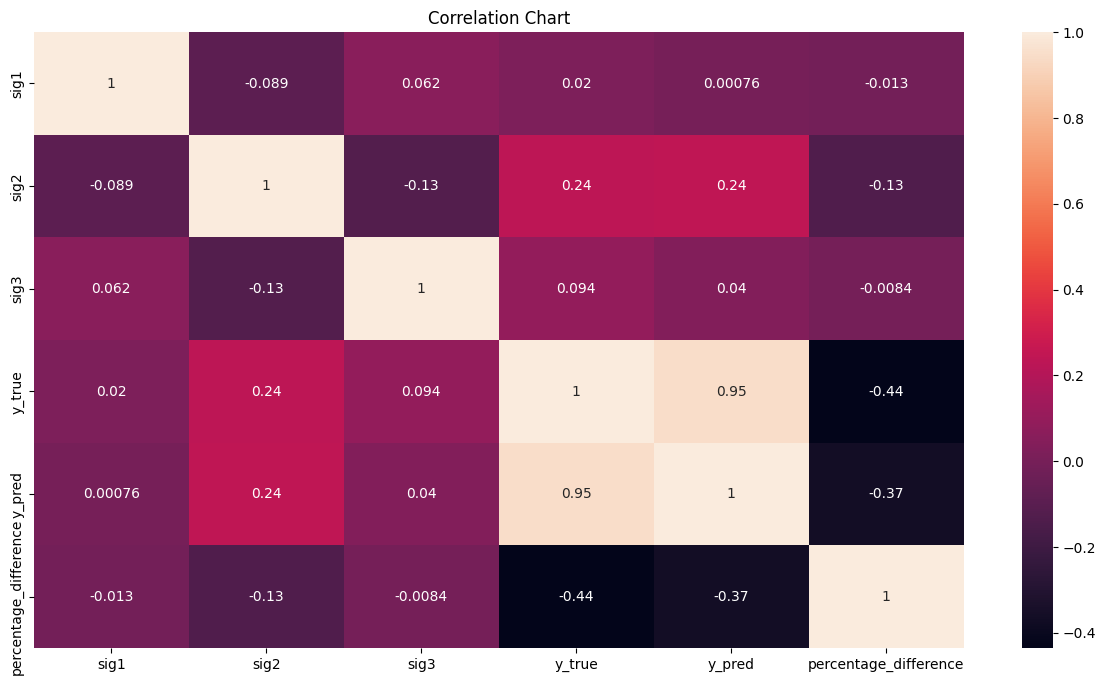

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df[numerical].corr(), annot=True)\
.set(title = 'Correlation Chart');

I will use a paired t-test to determine if the difference between y_true and y_pred is statistically significant, as there appears to be a strong relationship between the two variables."

#### Paird T-test

*   Paird T-test is statistical test used to compare the means of two related samples. The paired t-test is appropriate when the two samples are not independent, but are instead paired or matched in some way.

*  To investigate whether the average y_true values are equal to the average y_pred values for each vin_id, I will conduct a paired T-test with a significance level of 5% (alpha=0.05):

   *  The null hypothesis (H0): The mean difference between y_true and y_pred is equal to zero, which indicates that the car is fine. 
   *   The alternative hypothesis (H1): The mean difference between y_true and y_pred is different from zero, which indicates that the car needs repair.






In [ ]:
groups = df.groupby('vin_id')

# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['vin_id', 't', 'p_value'])

# Iterate over groups and conduct paired t-test
for vin_id, group in groups:
    t, p = stats.ttest_rel(a= group['y_true'], b=group['y_pred'])
    p_value = round(p, 3)
    if p_value < 0.05:
        hypothesis = "Problem detection"
    else:
        hypothesis = "Good"
    results = results.append({'vin_id': vin_id, 't': "{:.2f}".format(t), 'p_value': p_value, 'hypothesis': hypothesis}, ignore_index=True)

# Sort the results by p-value
results = results.sort_values(by=['p_value'])

# Print the results
results.sort_values(by='p_value', ascending=False, ignore_index=True).head()

,vin_id,t,p_value,hypothesis
0,34,-0.59,0.553,Good
1,13,-56.12,0.000,Problem detection
2,4,-37.76,0.000,Problem detection
3,5,87.80,0.000,Problem detection
4,6,42.83,0.000,Problem detection


*   If the p-value is less than the chosen significance level (0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the two related samples.
*   The t-value is a measure of the difference between the means of the two related samples, scaled by the standard error of the difference between the means. It indicates how many standard errors the difference is away from zero. A t-value that is far from zero suggests that there is a significant difference between the means of the two related samples.



In [ ]:
merged_df = pd.merge(df, results[['vin_id', 'hypothesis']], on='vin_id')

merged_df.head()

,vin_id,timestamp,sig1,sig2,sig3,y_true,y_pred,percentage_difference,hypothesis
0,18,2023-01-26 03:34:00,282271.810,12.28125,3.80,40.111111,41.470903,0.033901,Problem detection
1,18,2023-01-26 03:34:00,282271.860,12.18750,3.76,40.888889,41.823414,0.022855,Problem detection
2,18,2023-01-26 03:35:00,282272.005,12.09375,3.44,43.111111,42.294691,0.018938,Problem detection
3,18,2023-01-26 03:36:00,282272.420,11.87500,4.76,46.222222,43.942626,0.049318,Problem detection
4,18,2023-01-26 03:37:00,282272.600,11.78125,3.64,47.666667,44.317288,0.070267,Problem detection


In [ ]:
vin_id_filter= df['vin_id'] == 4
subset_df = df[vin_id_filter][['y_true','y_pred']]

In [ ]:
subset_df.describe()

,y_true,y_pred
count,4330.000000,4330.000000
mean,83.000038,84.771430
std,10.474231,8.560347
min,28.555556,28.118014
25%,78.666667,82.241539
50%,85.111111,86.010152
75%,90.777778,90.949900
max,96.333333,99.679323


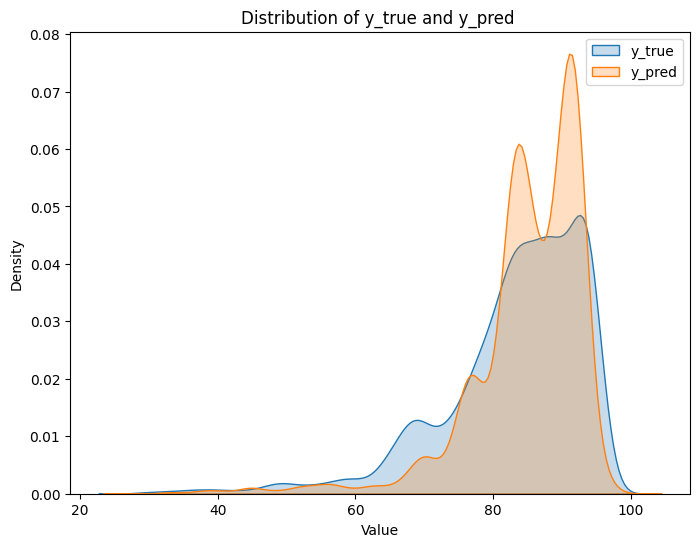

In [ ]:
# Create a KDE plot for y_true and y_pred
plt.figure(figsize=(8, 6))
sns.kdeplot(subset_df['y_true'], shade=True, label='y_true')
sns.kdeplot(subset_df['y_pred'], shade=True, label='y_pred')
plt.xlabel('Value')
plt.title('Distribution of y_true and y_pred ')
plt.legend()
plt.show()

### Numeric to Numeric Observations



*   A high correlation exists between y_pred and y_true, indicating that most cars are safe

* After testing the claim at the car level, I found that there is a significant difference between the predicted (y_pred) and actual (y_true) values. Using a significance level of 5%, the results indicate that the vast majority of cars are not functioning normally, as the difference between the predicted and actual values is statistically significant. This finding highlights the need for further investigation and potential repairs to ensure the safety of the vehicles



# **Automatic data export**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p /content/drive/My\ Drive/folder_name

file_path = '/content/drive/My Drive/folder_name/raw_data.csv'
merged_df.to_csv(file_path, index=False)

Mounted at /content/drive
